In [158]:
# Imports
## Data processing
import pandas as pd
import numpy as np
## Machine Learning
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
## Plotting
from matplotlib import pyplot as plt
## Harmonizome API
from harmonizome import Harmonizome
## Utility
import re
import json
from functools import reduce
from IPython.display import display

In [159]:
# attribute_datasets = {{ MultiChoiceField(
#                         name='attribute-databases',
#                         label='Attribute Selection',
#                         hint='Databases to use for prediction',
#                         default=[
#                             'CCLE Cell Line Gene Expression Profiles',
#                             'ENCODE Transcription Factor Targets',
#                         ],
#                         choices=[
#                             'CCLE Cell Line Gene Expression Profiles',
#                             'ENCODE Transcription Factor Targets',
#                             'Allen Brain Atlas Adult Human Brain Tissue Gene Expression Profiles',
#                             'CHEA Transcription Factor Targets',
#                             'BioGPS Cell Line Gene Expression Profiles',
#                             'GTEx Tissue Gene Expression Profiles',
#                         ],
#                         group='Targets',
#                     ) }}
attribute_datasets = [
                            'CCLE Cell Line Gene Expression Profiles',
                            'ENCODE Transcription Factor Targets',
                        ]

# Download attribute datasets from Harmonizome
df_attributes = list(Harmonizome.download_df(
    [dataset
     for dataset in attribute_datasets],
    ['gene_attribute_matrix.txt.gz'],
))
for name, df in zip(attribute_datasets, df_attributes):
    df.index.name = json.loads(df.index.name)[0]
    df.index = df.index.map(lambda s: json.loads(s)[0])
    print('%s shape:' % (name), df.shape)
    display(df.head())

# Assemble all attribute datasets
if len(df_attributes) > 1:
    # Obtain merged dataframe with omics and target data
    df = reduce(
        lambda a, b: pd.merge( # Merge two dataframes item by item
            a, # left
            b, # right
            # Items with the same left and right index are merged
            left_index=True,
            right_index=True,
            how='inner', # Drop any mis-matched index
        ),
        df_attributes,
    )
else:
    df = df_attributes[0]

X = df.applymap(lambda f: 1 if f==1 else 0)
print('Total Shape:', X.shape)
display(X.head())

CCLE Cell Line Gene Expression Profiles shape: (18025, 1037)


["CHL1", "skin", "na"]  ["HMCB", "skin", "na"]  \
GeneSym                                                   
FBN1    NaN                     NaN                       
ITGBL1  NaN                     NaN                       
LRP1    NaN                     NaN                       
LTBP2   NaN                     NaN                       
PARVA   NaN                     NaN                       

         ["HS852T", "skin", "na"]  ["HS695T", "skin", "na"]  \
GeneSym                                                       
FBN1    NaN                       NaN                         
ITGBL1  NaN                       NaN                         
LRP1    NaN                       NaN                         
LTBP2   NaN                       NaN                         
PARVA   NaN                       NaN                         

         ["A101D", "skin", "na"]  ["HS294T", "skin", "na"]  \
GeneSym                                                      
FBN1    NaN                      NaN                         
ITGBL1  NaN                      NaN                         
LRP1    NaN                      NaN                         
LTBP2   NaN                      NaN                         
PARVA   NaN                      NaN                         

         ["SNU466", "central nervous system", "na"]  \
GeneSym                                               
FBN1    NaN                                           
ITGBL1  NaN                                           
LRP1     1.0                                          
LTBP2   NaN                                           
PARVA   NaN                                           

         ["SKMEL31", "skin", "na"]  ["SKMEL24", "skin", "na"]  \
GeneSym                                                         
FBN1    NaN                        NaN                          
ITGBL1  NaN                        NaN                          
LRP1    NaN                        NaN                          
LTBP2   NaN                        NaN                          
PARVA   NaN                        NaN                          

         ["WM115", "skin", "na"]  ["COLO818", "skin", "na"]  \
GeneSym                                                       
FBN1    NaN                      NaN                          
ITGBL1  NaN                      NaN                          
LRP1    NaN                      NaN                          
LTBP2   NaN                      NaN                          
PARVA   NaN                      NaN                          

         ["COLO800", "skin", "na"]  ["HT144", "skin", "na"]  \
GeneSym                                                       
FBN1    NaN                        NaN                        
ITGBL1  NaN                        NaN                        
LRP1    NaN                        NaN                        
LTBP2   NaN                        NaN                        
PARVA   NaN                        NaN                        

         ["HS939T", "skin", "na"]  ["RVH421", "skin", "na"]  \
GeneSym                                                       
FBN1    NaN                       NaN                         
ITGBL1  NaN                       NaN                         
LRP1    NaN                       NaN                         
LTBP2   NaN                       NaN                         
PARVA   NaN                       NaN                         

         ["C32", "skin", "na"]  ["UACC62", "skin", "na"]  \
GeneSym                                                    
FBN1    NaN                    NaN                         
ITGBL1  NaN                    NaN                         
LRP1    NaN                    NaN                         
LTBP2   NaN                    NaN                         
PARVA   NaN                    NaN                         

         ["COLO679", "skin", "na"]  ["COLO829", "skin", "na"]  \
GeneSym                                                         

ENCODE Transcription Factor Targets shape: (22819, 181)


["ARID3A", "na", "1820"]  ["ATF1", "na", "466"]  \
GeneSym                                                     
A1BG      1.0                      NaN                      
A1BG-AS1  1.0                      NaN                      
A1CF      1.0                      NaN                      
A2M       1.0                      NaN                      
A2ML1    NaN                       NaN                      

          ["ATF2", "na", "1386"]  ["ATF3", "na", "467"]  \
GeneSym                                                   
A1BG     NaN                     NaN                      
A1BG-AS1 NaN                     NaN                      
A1CF     NaN                     NaN                      
A2M      NaN                     NaN                      
A2ML1     1.0                    NaN                      

          ["BACH1", "na", "571"]  ["BATF", "na", "10538"]  \
GeneSym                                                     
A1BG     NaN                     NaN                        
A1BG-AS1 NaN                     NaN                        
A1CF     NaN                     NaN                        
A2M      NaN                     NaN                        
A2ML1    NaN                     NaN                        

          ["BCL11A", "na", "53335"]  ["BCL3", "na", "602"]  \
GeneSym                                                      
A1BG     NaN                        NaN                      
A1BG-AS1 NaN                        NaN                      
A1CF     NaN                        NaN                      
A2M      NaN                        NaN                      
A2ML1    NaN                        NaN                      

          ["BCLAF1", "na", "9774"]  ["BDP1", "na", "55814"]  \
GeneSym                                                       
A1BG     NaN                       NaN                        
A1BG-AS1 NaN                       NaN                        
A1CF     NaN                       NaN                        
A2M      NaN                       NaN                        
A2ML1    NaN                       NaN                        

          ["BHLHE40", "na", "8553"]  ["BRCA1", "na", "672"]  \
GeneSym                                                       
A1BG      1.0                       NaN                       
A1BG-AS1  1.0                       NaN                       
A1CF     NaN                        NaN                       
A2M       1.0                       NaN                       
A2ML1     1.0                        1.0                      

          ["BRF1", "na", "2972"]  ["BRF2", "na", "55290"]  \
GeneSym                                                     
A1BG     NaN                     NaN                        
A1BG-AS1 NaN                     NaN                        
A1CF     NaN                     NaN                        
A2M      NaN                     NaN                        
A2ML1    NaN                     NaN                        

          ["CBX2", "na", "84733"]  ["CBX3", "na", "11335"]  \
GeneSym                                                      
A1BG     NaN                      NaN                        
A1BG-AS1 NaN                      NaN                        
A1CF     NaN                      NaN                        
A2M       1.0                     NaN                        
A2ML1    NaN                       1.0                       

          ["CBX8", "na", "57332"]  ["CCNT2", "na", "905"]  \
GeneSym                                                     
A1BG     NaN                      NaN                       
A1BG-AS1 NaN                      NaN                       
A1CF     NaN                      NaN                       
A2M      NaN                      NaN                       
A2ML1    NaN                      NaN                       

          ["CEBPB", "na", "1051"]  ["CEBPD", "na", "1052"]  \
GeneSym                                                      
A1BG  

Total Shape: (17480, 1218)


["CHL1", "skin", "na"]  ["HMCB", "skin", "na"]  \
GeneSym                                                   
FBN1     0                       0                        
ITGBL1   0                       0                        
LRP1     0                       0                        
LTBP2    0                       0                        
PARVA    0                       0                        

         ["HS852T", "skin", "na"]  ["HS695T", "skin", "na"]  \
GeneSym                                                       
FBN1     0                         0                          
ITGBL1   0                         0                          
LRP1     0                         0                          
LTBP2    0                         0                          
PARVA    0                         0                          

         ["A101D", "skin", "na"]  ["HS294T", "skin", "na"]  \
GeneSym                                                      
FBN1     0                        0                          
ITGBL1   0                        0                          
LRP1     0                        0                          
LTBP2    0                        0                          
PARVA    0                        0                          

         ["SNU466", "central nervous system", "na"]  \
GeneSym                                               
FBN1     0                                            
ITGBL1   0                                            
LRP1     1                                            
LTBP2    0                                            
PARVA    0                                            

         ["SKMEL31", "skin", "na"]  ["SKMEL24", "skin", "na"]  \
GeneSym                                                         
FBN1     0                          0                           
ITGBL1   0                          0                           
LRP1     0                          0                           
LTBP2    0                          0                           
PARVA    0                          0                           

         ["WM115", "skin", "na"]  ["COLO818", "skin", "na"]  \
GeneSym                                                       
FBN1     0                        0                           
ITGBL1   0                        0                           
LRP1     0                        0                           
LTBP2    0                        0                           
PARVA    0                        0                           

         ["COLO800", "skin", "na"]  ["HT144", "skin", "na"]  \
GeneSym                                                       
FBN1     0                          0                         
ITGBL1   0                          0                         
LRP1     0                          0                         
LTBP2    0                          0                         
PARVA    0                          0                         

         ["HS939T", "skin", "na"]  ["RVH421", "skin", "na"]  \
GeneSym                                                       
FBN1     0                         0                          
ITGBL1   0                         0                          
LRP1     0                         0                          
LTBP2    0                         0                          
PARVA    0                         0                          

         ["C32", "skin", "na"]  ["UACC62", "skin", "na"]  \
GeneSym                                                    
FBN1     0                      0                          
ITGBL1   0                      0                          
LRP1     0                      0                          
LTBP2    0                      0                          
PARVA    0                      0                          

         ["COLO679", "skin", "na"]  ["COLO829", "skin", "na"]  \
GeneSym                                                         

In [160]:
# target_class = "{{ TargetClassSearchField(
#                         name='target-class',
#                         label='Class Selection',
#                         hint='Class you want to predict',
#                         default='central nervous system (SNU466 from CCLE Cell Line Gene Expression Profiles)',
#                         examples=[
#                         ],
#                         group='Targets',
#                     ) }}"
target_class = "intracranial cystic lesion (Phenotype from HPO Gene-Disease Associations)"

# Separate target attribute and dataset
class_name, class_type, class_dataset = re.match(
    r'^(.+) \((.+) from (.+)\)$',
    target_class,
).groups()
target_class_col = class_name

# Download class datasets from Harmonizome
df_class = list(Harmonizome.download_df(
    [class_dataset],
    ['gene_attribute_matrix.txt.gz'],
))[0]
df_class.columns = df_class.columns.map(lambda s: json.loads(s)[0])
df_class.index.name = json.loads(df_class.index.name)[0]
df_class.index = df_class.index.map(lambda s: json.loads(s)[0])
print('%s shape:' % (class_dataset), df_class.shape)
display(df_class.head())

# Collect genes of interest
target_genes = df_class[df_class[target_class_col] == 1].index
print('Number of Target Genes:', len(target_genes))

HPO Gene-Disease Associations shape: (3158, 6842)


severe t lymphocytopenia  \
GeneSym                             
CNGA1   NaN                         
NEK2    NaN                         
MAK     NaN                         
CA4     NaN                         
GUCA1B  NaN                         

         failure to thrive secondary to recurrent infections  \
GeneSym                                                        
CNGA1   NaN                                                    
NEK2    NaN                                                    
MAK     NaN                                                    
CA4     NaN                                                    
GUCA1B  NaN                                                    

         recurrent opportunistic infections  abnormality of b cell number  \
GeneSym                                                                     
CNGA1   NaN                                 NaN                             
NEK2    NaN                                 NaN                             
MAK     NaN                                 NaN                             
CA4     NaN                                 NaN                             
GUCA1B  NaN                                 NaN                             

         b lymphocytopenia  severe b lymphocytopenia  \
GeneSym                                                
CNGA1   NaN                NaN                         
NEK2    NaN                NaN                         
MAK     NaN                NaN                         
CA4     NaN                NaN                         
GUCA1B  NaN                NaN                         

         abnormality of the mastoid  mastoiditis  abnormal lymphocyte count  \
GeneSym                                                                       
CNGA1   NaN                         NaN          NaN                          
NEK2    NaN                         NaN          NaN                          
MAK     NaN                         NaN          NaN                          
CA4     NaN                         NaN          NaN                          
GUCA1B  NaN                         NaN          NaN                          

         abnormality of t cell number  t lymphocytopenia  leukocytosis  \
GeneSym                                                                  
CNGA1   NaN                           NaN                NaN             
NEK2    NaN                           NaN                NaN             
MAK     NaN                           NaN                NaN             
CA4     NaN                           NaN                NaN             
GUCA1B  NaN                           NaN                NaN             

         abnormality of eosinophils  eosinophilia  granulocytopenia  \
GeneSym                                                               
CNGA1   NaN                         NaN           NaN                 
NEK2    NaN                         NaN           NaN                 
MAK     NaN                         NaN           NaN                 
CA4     NaN                         NaN           NaN                 
GUCA1B  NaN                         NaN           NaN                 

         thyroiditis  combined immunodeficiency  \
GeneSym                                           
CNGA1   NaN          NaN                          
NEK2    NaN          NaN                          
MAK     NaN          NaN                          
CA4     NaN          NaN                          
GUCA1B  NaN          NaN                          

         severe combined immunodeficiency  sepsis  abnormality of the thymus  \
GeneSym                                                                        
CNGA1   NaN                               NaN     NaN                          
NEK2    NaN                               NaN     NaN                          
MAK     NaN                               NaN     NaN                          
CA4     NaN                           

Number of Target Genes: 92


In [161]:
# Create final target array
y = np.in1d(X.index, target_genes).astype(np.int8)
print('Known Target Genes: %d (%0.3f %%)' % (y.sum(), 100*y.sum()/len(y)))

# Output data shapes
print('Input shape:', X.shape)
print('Target shape:', y.shape)

Known Target Genes: 89 (0.509 %)
Input shape: (17480, 1218)
Target shape: (17480,)


Explained variance: 
 X: 12.606856118382662 
 y: 1.2788928409277396 



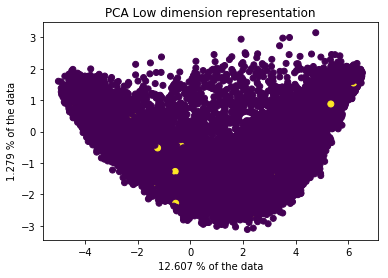

In [162]:
# Perform PCA reporting the explained variance
clf = sk.decomposition.PCA(n_components=2, random_state=rng)
X_transformed = clf.fit_transform(X.values)

clf_X_var, clf_y_var = clf.explained_variance_
print('Explained variance:', '\n',
      'X:', clf_X_var, '\n',
      'y:', clf_y_var, '\n')

# Plot results of PCA
plt.title('PCA Low dimension representation')
plt.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    c=y,
)
plt.xlabel('%0.3f %% of the data' % (clf_X_var))
plt.ylabel('%0.3f %% of the data' % (clf_y_var))
plt.show()

In [163]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Train an autoencoder using batch normalization in a supervised manner to learn how to compress the dimensionality of the model.

In [164]:
input_0 = Input(shape=(X.shape[1],))
enc_0 = Dropout(.2)(Dense(256, activation='relu')(BatchNormalization()(input_0)))
reduced_0 = Dropout(.2)(Dense(128, activation='relu')(BatchNormalization()(enc_0)))
enc_1 = Dropout(.2)(Dense(256, activation='relu')(BatchNormalization()(reduced_0)))
output_0 = Dense(X.shape[1], activation='sigmoid')(enc_1)

autoencoder = Model(
  inputs=input_0,
  outputs=output_0,
)

autoencoder.compile(
    optimizer='adadelta', loss='binary_crossentropy',
    metrics=['acc'])
fit_history = autoencoder.fit(
  X.values, X.values,
  epochs=50, batch_size=128,
  shuffle=True, validation_data=(X.values, X.values),
  callbacks=[early_stopping],
)

Train on 17480 samples, validate on 17480 samples
Epoch 1/50
17480/17480 [==============================] - 7s 424us/step - loss: 0.4340 - acc: 0.8520 - val_loss: 0.1664 - val_acc: 0.9573
Epoch 2/50
17480/17480 [==============================] - 4s 248us/step - loss: 0.1523 - acc: 0.9575 - val_loss: 0.1406 - val_acc: 0.9587
Epoch 3/50
17480/17480 [==============================] - 4s 244us/step - loss: 0.1446 - acc: 0.9582 - val_loss: 0.1379 - val_acc: 0.9593
Epoch 4/50
17480/17480 [==============================] - 4s 244us/step - loss: 0.1431 - acc: 0.9586 - val_loss: 0.1369 - val_acc: 0.9596
Epoch 5/50
17480/17480 [==============================] - 4s 239us/step - loss: 0.1422 - acc: 0.9588 - val_loss: 0.1361 - val_acc: 0.9598
Epoch 6/50
17480/17480 [==============================] - 4s 240us/step - loss: 0.1413 - acc: 0.9590 - val_loss: 0.1356 - val_acc: 0.9599
Epoch 7/50
17480/17480 [==============================] - 4s 239us/step - loss: 0.1407 - acc: 0.9592 - val_loss: 0.1351 - 

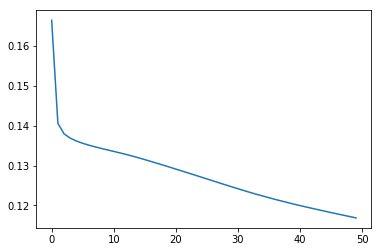

In [165]:
plt.plot(fit_history.history['val_loss'])
plt.show()

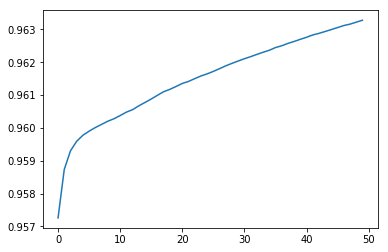

In [166]:
plt.plot(fit_history.history['val_acc'])
plt.show()

Use the middle (compressed) layer of the autoencoder to compress our input into lower dimensionality.

In [167]:
encoder = Model(
  inputs=input_0,
  outputs=reduced_0,
)
X_reduced = encoder.predict(X.values)

In [168]:
input_1 = Input(shape=(128,))
enc_2 = Dense(256, activation='relu')(BatchNormalization()(input_1))
enc_3 = Dense(128, activation='relu')(BatchNormalization()(enc_2))
output_1 = Dense(1, activation='sigmoid')(BatchNormalization()(enc_3))

one_classifier = Model(
  inputs=input_1,
  outputs=output_1,
)
one_classifier.compile(optimizer='adadelta', loss='binary_crossentropy',
    metrics=['acc'])
fit_history = one_classifier.fit(
  X_reduced, y.values[:, 0],
  epochs=50, batch_size=128,
  shuffle=True, validation_split=0.2,
  callbacks=[early_stopping])

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
plt.plot(fit_history.history['val_loss'])
plt.show()

In [ ]:
plt.plot(fit_history.history['acc'])
plt.show()

In [ ]:
# Obtain prediction results
y_preds = one_classifier.predict(X_reduced)
results = pd.DataFrame(np.array([
    y.values[:, 0],
    y_preds[:, 0],
]).T, columns=[
    'Known',
    'Predicted',
], index=X.index)
results[((results['Known'] != 1.) & (results['Predicted']>0.25))] \
    .sort_values('Predicted', ascending=False)